# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.

Tugas kamu adalah membuat model clustering yang selanjutnya akan digunakan untuk membuat model klasifikasi.


# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [1]:
#Type your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import joblib
from google.colab import files
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

Penting: pada kriteria pertama hindari penggunaan print() dan display() karena seluruh fungsi yang digunakan sudah memiliki standar output dan menghasilkan output yang diharapkan.

Kriteria 1 akan ditolak ketika:
- print(__.head())
- display(___.head())
dst

Kriteria 1 akan diterima ketika Anda menggunakan fungsi yang diminta tanpa menambahkan deskripsi apapun.

In [2]:
# Load data
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)

In [3]:
# Tampilkan 5 baris pertama dengan function head.
df.head()

TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
4      TX000005   AC00411              13.45  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0         70.0             Doctor                 81.0            1.0   
1         68.0             Doctor                141.0            1.0   
2         19.0            Student                 56.0            1.0   
3         26.0            Student                 25.0            1.0   
4          NaN            Student                198.0            1.0   

   AccountBalance PreviousTransactionDate  
0         5112.21     2024-11-04 08:08:08  
1        13758.91     2024-11-04 08:09:35  
2         1122.35     2024-11-04 08:07:04  
3         8569.06     2024-11-04 08:09:06  
4         7429.40     2024-11-04 08:06:39

In [4]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [5]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
count        2511.000000  2519.000000          2511.000000    2516.000000   
mean          297.656468    44.678444           119.422939       1.121622   
std           292.230367    17.837359            70.078513       0.594469   
min             0.260000    18.000000            10.000000       1.000000   
25%            81.310000    27.000000            63.000000       1.000000   
50%           211.360000    45.000000           112.000000       1.000000   
75%           413.105000    59.000000           161.000000       1.000000   
max          1919.110000    80.000000           300.000000       5.000000   

       AccountBalance  
count     2510.000000  
mean      5113.438124  
std       3897.975861  
min        101.250000  
25%       1504.727500  
50%       4734.110000  
75%       7672.687500  
max      14977.990000

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

**Apabila ingin menerapkan Advanced, pastikan seluruh visualisasi tidak ada yang overlap**

In [6]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()

In [7]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
df.hist(figsize=(12, 8), bins=30, edgecolor='k')
plt.tight_layout()
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [8]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [9]:
# Mengecek dataset menggunakan isnull().sum()
df.isnull().sum()

TransactionID              29
AccountID                  21
TransactionAmount          26
TransactionDate            28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
PreviousTransactionDate    24
dtype: int64

In [10]:
# Mengecek dataset menggunakan duplicated().sum()
df.duplicated().sum()

np.int64(21)

In [11]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.
fitur_numerik = df.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()
df[fitur_numerik] = scaler.fit_transform(df[fitur_numerik])

df.head()

TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128          -0.970546  2023-04-11 16:29:14   
1      TX000002   AC00455           0.268963  2023-06-27 16:44:19   
2      TX000003   AC00019          -0.586526  2023-07-10 18:16:08   
3      TX000004   AC00070          -0.387294  2023-05-05 16:32:11   
4      TX000005   AC00411          -0.972736  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0     1.419862             Doctor            -0.548393      -0.204629   
1     1.307715             Doctor             0.307960      -0.204629   
2    -1.439874            Student            -0.905207      -0.204629   
3    -1.047361            Student            -1.347656      -0.204629   
4          NaN            Student             1.121495      -0.204629   

   AccountBalance PreviousTransactionDate  
0       -0.000315     2024-11-04 08:08:08  
1        2.218381     2024-11-04 08:09:35  
2       -1.024091     2024-11-04 08:07:04  
3        0.886694     2024-11-04 08:09:06  
4        0.594263     2024-11-04 08:06:39

In [12]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
df = df.drop(columns=['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID'])

df.head()

TransactionAmount      TransactionDate TransactionType   Location Channel  \
0          -0.970546  2023-04-11 16:29:14           Debit  San Diego     ATM   
1           0.268963  2023-06-27 16:44:19           Debit    Houston     ATM   
2          -0.586526  2023-07-10 18:16:08           Debit       Mesa  Online   
3          -0.387294  2023-05-05 16:32:11           Debit    Raleigh  Online   
4          -0.972736  2023-10-16 17:51:24          Credit    Atlanta  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0     1.419862             Doctor            -0.548393      -0.204629   
1     1.307715             Doctor             0.307960      -0.204629   
2    -1.439874            Student            -0.905207      -0.204629   
3    -1.047361            Student            -1.347656      -0.204629   
4          NaN            Student             1.121495      -0.204629   

   AccountBalance PreviousTransactionDate  
0       -0.000315     2024-11-04 08:08:08  
1        2.218381     2024-11-04 08:09:35  
2       -1.024091     2024-11-04 08:07:04  
3        0.886694     2024-11-04 08:09:06  
4        0.594263     2024-11-04 08:06:39

In [13]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.
fitur_encode = df.select_dtypes(include=['object']).columns

encoders = {}
for col in fitur_encode:
  le = LabelEncoder()
  df[col] = le.fit_transform(df[col].astype(str))
  encoders[col] = le

df.head()

TransactionAmount  TransactionDate  TransactionType  Location  Channel  \
0          -0.970546              680                1        36        0   
1           0.268963             1178                1        15        0   
2          -0.586526             1262                1        23        2   
3          -0.387294              818                1        33        2   
4          -0.972736             1939                0         1        2   

   CustomerAge  CustomerOccupation  TransactionDuration  LoginAttempts  \
0     1.419862                   0            -0.548393      -0.204629   
1     1.307715                   0             0.307960      -0.204629   
2    -1.439874                   3            -0.905207      -0.204629   
3    -1.047361                   3            -1.347656      -0.204629   
4          NaN                   3             1.121495      -0.204629   

   AccountBalance  PreviousTransactionDate  
0       -0.000315                      105  
1        2.218381                      192  
2       -1.024091                       41  
3        0.886694                      163  
4        0.594263                       16

In [14]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
# ____.columns.tolist()
df.columns.tolist()

['TransactionAmount',
 'TransactionDate',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'PreviousTransactionDate']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [15]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
df = df.dropna()
df.isnull().sum()

TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

In [16]:
# Menghapus data duplikat menggunakan drop_duplicates().
df = df.drop_duplicates()

df.duplicated().sum()

np.int64(0)

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [17]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.

In [18]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.
# Pastikan kamu mengerjakan tahapan ini pada satu cell.

# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [19]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
# ___.describe()
df.describe()

TransactionAmount  TransactionDate  TransactionType     Location  \
count        2398.000000      2398.000000      2398.000000  2398.000000   
mean           -0.000425      1256.404921         0.788574    21.383653   
std             0.997561       726.716182         0.437979    12.417622   
min            -1.017881         0.000000         0.000000     0.000000   
25%            -0.737943       626.250000         1.000000    11.000000   
50%            -0.290005      1254.500000         1.000000    21.000000   
75%             0.389115      1884.750000         1.000000    32.000000   
max             5.549651      2485.000000         2.000000    43.000000   

           Channel  CustomerAge  CustomerOccupation  TransactionDuration  \
count  2398.000000  2398.000000         2398.000000          2398.000000   
mean      1.013344    -0.003388            1.532110             0.000832   
std       0.831075     1.000136            1.153802             1.003159   
min       0.000000    -1.495947            0.000000            -1.561745   
25%       0.000000    -0.991288            0.000000            -0.805299   
50%       1.000000     0.018031            2.000000            -0.105944   
75%       2.000000     0.803056            3.000000             0.607683   
max       3.000000     1.980594            4.000000             2.577295   

       LoginAttempts  AccountBalance  PreviousTransactionDate  
count    2398.000000     2398.000000              2398.000000  
mean       -0.002560       -0.006050               180.984987  
std         0.989711        1.001030               103.757245  
min        -0.204629       -1.286100                 0.000000  
25%        -0.204629       -0.929992                92.000000  
50%        -0.204629       -0.110335               181.000000  
75%        -0.204629        0.652406               271.750000  
max         6.525404        2.531190               360.000000

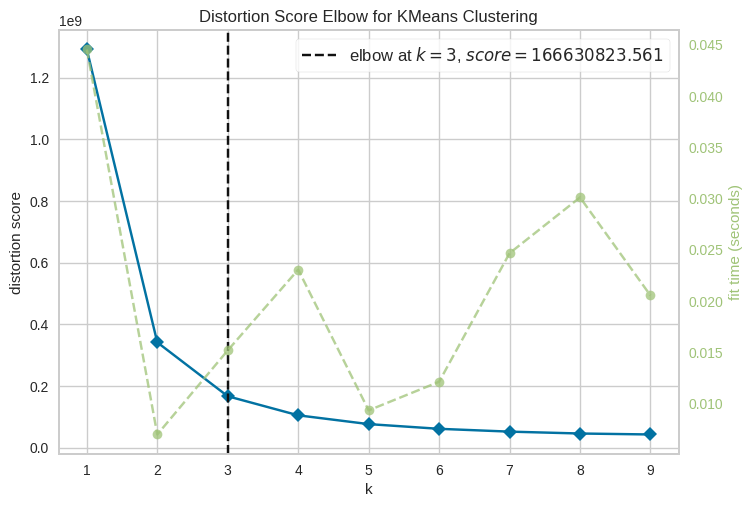

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
kmeans = KMeans()

visualizer = KElbowVisualizer(kmeans, k=(1, 10))

visualizer.fit(df)
visualizer.show()

In [21]:
# Menggunakan algoritma K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df)

labels = kmeans.labels_
df['Target'] = labels
df.head()

TransactionAmount  TransactionDate  TransactionType  Location  Channel  \
0          -0.970546              680                1        36        0   
1           0.268963             1178                1        15        0   
2          -0.586526             1262                1        23        2   
3          -0.387294              818                1        33        2   
5          -0.703375              635                1        28        0   

   CustomerAge  CustomerOccupation  TransactionDuration  LoginAttempts  \
0     1.419862                   0            -0.548393      -0.204629   
1     1.307715                   0             0.307960      -0.204629   
2    -1.439874                   3            -0.905207      -0.204629   
3    -1.047361                   3            -1.347656      -0.204629   
5    -1.495947                   3             0.750409      -0.204629   

   AccountBalance  PreviousTransactionDate  Target  
0       -0.000315                      105       1  
1        2.218381                      192       2  
2       -1.024091                       41       2  
3        0.886694                      163       1  
5       -1.111505                       13       1

Jalankan cell code ini untuk menyimpan model kamu.

In [22]:
# Menyimpan model menggunakan joblib
# import joblib
# joblib.dump(___, "model_clustering.h5")
joblib.dump(kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [23]:
# Menghitung dan menampilkan nilai Silhouette Score.
silhouette = silhouette_score(df.drop(columns=['Target']), kmeans.labels_)
silhouette

np.float64(0.5403396126103239)

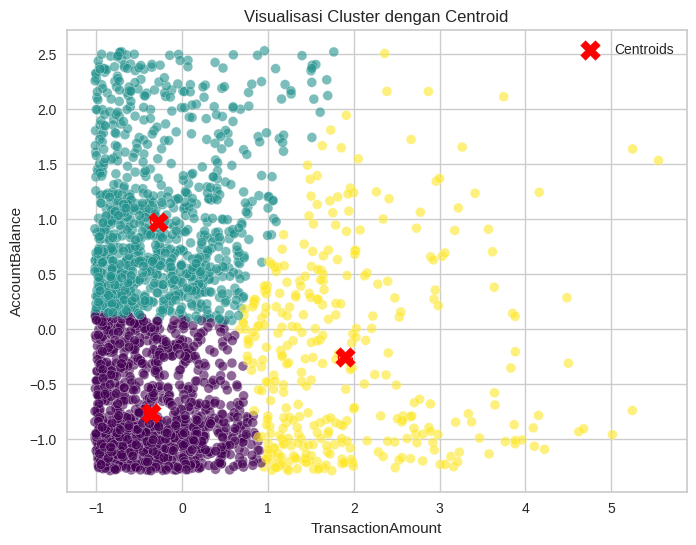

In [24]:
# Membuat visualisasi hasil clustering
# Mengambil 2 fitur numerik utama
X = df[['TransactionAmount', 'AccountBalance']].values

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

# Ambil label cluster dan posisi centroid
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Visualisasi hasil clustering
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6, edgecolors='w')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')

# Tambahkan teks di centroid biar jelas
for i, c in enumerate(centroids):
    plt.text(c[0], c[1], f'C{i+1}', color='red', fontsize=10, ha='center', va='center')

plt.title('Visualisasi Cluster dengan Centroid')
plt.xlabel('TransactionAmount')
plt.ylabel('AccountBalance')
plt.legend()
plt.show()

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [25]:
# Membangun model menggunakan PCA.
# ___ =PCA(n_components=<x>)
# ___ = ____.fit_transform(___)
# Menyimpan data PCA sebagai Dataframe dengan nama PCA_<numbers>
# <data_final> = pd.DataFrame(___, columns=['PCA1', 'PCA2', <sesuaikan dengan jumlah n>])
# Pastikan kamu membangun model Kmeans baru dengan data yang sudah dimodifikasi melalui PCA.
# ___ = KMeans(n_clusters=<x>)
# ___.fit(<data_final>)

In [26]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# Pastikan yang disimpan model yang sudah melalui .fit berdasarkan dataset yang sudah dilakukan PCA
# joblib.dump(___, "PCA_model_clustering.h5")

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [27]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max.
df.groupby('Target').agg({
    'TransactionAmount' : ['mean', 'min', 'max'],
    'CustomerAge' : ['mean', 'min', 'max'],
    'TransactionDuration' : ['mean', 'min', 'max'],
    'LoginAttempts' : ['mean', 'min', 'max'],
    'AccountBalance' : ['mean', 'min', 'max']
})

TransactionAmount                     CustomerAge                      \
                    mean       min       max        mean       min       max   
Target                                                                         
0               0.027419 -1.017881  5.248151   -0.006370 -1.495947  1.980594   
1              -0.031922 -1.015827  5.244659   -0.062395 -1.495947  1.980594   
2               0.003132 -1.017676  5.549651    0.058766 -1.495947  1.980594   

       TransactionDuration                     LoginAttempts            \
                      mean       min       max          mean       min   
Target                                                                   
0                 0.020035 -1.561745  2.577295      0.007258 -0.204629   
1                -0.037565 -1.561745  2.563023      0.039640 -0.204629   
2                 0.020002 -1.561745  2.563023     -0.054745 -0.204629   

                 AccountBalance                      
             max           mean       min       max  
Target                                               
0       6.525404       0.028952 -1.286100  2.531190  
1       6.525404      -0.013638 -1.285856  2.522155  
2       6.525404      -0.033663 -1.281807  2.520287

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 0: (Nasabah dengan Saldo dan Transaksi Tinggi, Login Stabil)**:
  - **Rata-rata (mean) TransactionAmount:** 0.027 (192.250)
  - **Rata-rata (mean) AccountBalance:** 0.028 (2157.020)
  - **Rata-rata (mean) LoginAttempts:** 0.007 (1.128)
  - **Analisis:** Cluster ini mencakup nasabah dengan nilai transaksi dan saldo yang lebih tinggi dari rata-rata. Aktivitas loginnya stabil, sehingga kelompok/cluster ini lebih aman dan loyal. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk investasi atau layanan premium.

2. **Cluster 1: (Nasabah Muda, Saldo Rendah, Login Lebih Sering)**:
  - **Rata-rata (mean) TransactionAmount:** -0.031 (214.011)
  - **Rata-rata (mean) CustomerAge:** -0.062 (49.861)
  - **Rata-rata (mean) AccountBalance:** -0.013 (8922.473)
  - **Rata-rata (mean) LoginAttempts:** 0.039 (1.116)
  - **Analisis:** Cluster ini berisi nasabah muda dengan saldo relatif kecil, transaksi bernilai rendah, namun lebih sering melakukan login. Ada indikasi perilaku baru atau potensi risiko. Sehingga rekomendasikan kepada kelompok ini edukasi keamanan digital dan promosi tabungan untuk meningkatkan saldo.

3. **Cluster 2: (Nasabah Senior, Stabil, Saldo Menengah)**:
  - **Rata-rata (mean) CustomerAge:** 0.058 (43.397)
  - **Rata-rata (mean) TransactionDuration:** 0.020 (119.715)
  - **Rata-rata (mean) LoginAttempts:** -0.054 (1.102)
  - **Rata-rata (mean) AccountBalance:** -0.033 (4127.826)
  - **Analisis:** Cluster ini mencakup pelanggan dengan usia lebih tua, saldo sedang, dan aktivitas login aman. Mereka relatif stabil dan tidak berisiko. Sehingga dapat diberikan rekomendasi berupa tawaran produk perlindungan, konsultasi keuangan, atau layanan personal.

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [28]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
df['Target'] = labels

In [29]:
# Simpan Data
# ___.to_csv('data_clustering.csv', index=False)
df.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [30]:
# inverse dataset ke rentang normal untuk numerikal
# df[numerical_cols] = <nama_scaler>.inverse_transform(df[numerical_cols])
df[fitur_numerik] = scaler.inverse_transform(df[fitur_numerik])
# tampilkan dataset yang sudah di-inverse
# ___.head()
df.head()

TransactionAmount  TransactionDate  TransactionType  Location  Channel  \
0              14.09              680                1        36        0   
1             376.24             1178                1        15        0   
2             126.29             1262                1        23        2   
3             184.50              818                1        33        2   
5              92.15              635                1        28        0   

   CustomerAge  CustomerOccupation  TransactionDuration  LoginAttempts  \
0         70.0                   0                 81.0            1.0   
1         68.0                   0                141.0            1.0   
2         19.0                   3                 56.0            1.0   
3         26.0                   3                 25.0            1.0   
5         18.0                   3                172.0            1.0   

   AccountBalance  PreviousTransactionDate  Target  
0         5112.21                      105       0  
1        13758.91                      192       1  
2         1122.35                       41       0  
3         8569.06                      163       1  
5          781.68                       13       0

In [31]:
# inverse dataset yang sudah diencode ke kategori aslinya.
# Lengkapi kode berikut jika ingin menerapkan kriteria ini (silakan hapus simbol pagar pada kode yang akan digunakan.)
# for ___ in categorical_cols:
#     ___ = encoders[col]
#     df[col] = ___.inverse_transform(df_inverse[col].astype(int))
for col in fitur_encode:
  le = encoders[col]
  df[col] = le.inverse_transform(df[col].astype(int))
# tampilkan dataset yang sudah di-inverse
# ___.head()
df.head()

TransactionAmount      TransactionDate TransactionType       Location  \
0              14.09  2023-04-11 16:29:14           Debit      San Diego   
1             376.24  2023-06-27 16:44:19           Debit        Houston   
2             126.29  2023-07-10 18:16:08           Debit           Mesa   
3             184.50  2023-05-05 16:32:11           Debit        Raleigh   
5              92.15  2023-04-03 17:15:01           Debit  Oklahoma City   

  Channel  CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0     ATM         70.0             Doctor                 81.0            1.0   
1     ATM         68.0             Doctor                141.0            1.0   
2  Online         19.0            Student                 56.0            1.0   
3  Online         26.0            Student                 25.0            1.0   
5     ATM         18.0            Student                172.0            1.0   

   AccountBalance PreviousTransactionDate  Target  
0         5112.21     2024-11-04 08:08:08       0  
1        13758.91     2024-11-04 08:09:35       1  
2         1122.35     2024-11-04 08:07:04       0  
3         8569.06     2024-11-04 08:09:06       1  
5          781.68     2024-11-04 08:06:36       0

In [32]:
# Lakukan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal seperti pada basic tetapi menggunakan data yang sudah diinverse.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max kembali setelah melakukan inverse.
df.groupby('Target').agg({
    **{col: ['mean', 'min', 'max'] for col in fitur_numerik},
    **{col: pd.Series.mode for col in fitur_encode}
})

TransactionAmount                  CustomerAge              \
                    mean     min      max        mean   min   max   
Target                                                              
0             192.250803    0.26   566.33   40.575293  18.0  80.0   
1             214.011601    0.32   813.78   49.861259  18.0  80.0   
2             851.554688  492.93  1919.11   43.397727  18.0  80.0   

       TransactionDuration              LoginAttempts  ...       \
                      mean   min    max          mean  ...  max   
Target                                                 ...        
0               119.286745  10.0  299.0      1.128945  ...  5.0   
1               119.623266  10.0  300.0      1.116329  ...  5.0   
2               119.715909  10.0  300.0      1.102273  ...  5.0   

       AccountBalance                    TransactionDate TransactionType  \
                 mean      min       max            mode            mode   
Target                                                                     
0         2157.020361   101.25   5631.20             nan           Debit   
1         8922.473490  5422.53  14977.99             nan           Debit   
2         4127.826648   102.20  14881.77             nan           Debit   

           Location Channel CustomerOccupation  \
               mode    mode               mode   
Target                                           
0       Los Angeles  Branch            Student   
1         Las Vegas  Branch             Doctor   
2        Washington     ATM            Student   

                                  PreviousTransactionDate  
                                                     mode  
Target                                                     
0                                                     nan  
1                                     2024-11-04 08:10:23  
2       [2024-11-04 08:06:37, 2024-11-04 08:08:42, 202...  

[3 rows x 21 columns]

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [33]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.

In [34]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)

End of Code.